In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import wbdata

In [3]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
sns.set()

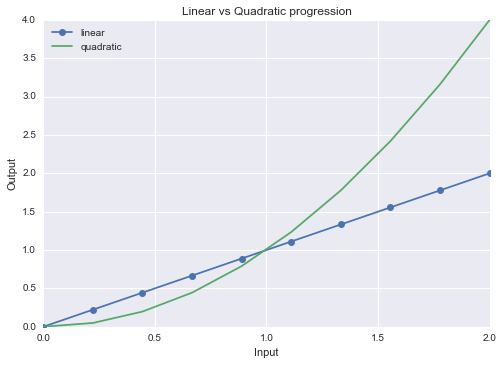

In [4]:
x = np.linspace(0, 2, 10)

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');
plt.show()

In [25]:
#set up the countries I want
countries = ["VEN","BRA"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'FP.CPI.TOTL.ZG':'inflation, consumer prices'}

In [17]:
wbdata.search_countries("venezuela")

VEN	Venezuela, RB


In [18]:
wbdata.search_indicators("inflation")

FP.CPI.TOTL.ZG   	Inflation, consumer prices (annual %)
NY.GDP.DEFL.KD.ZG	Inflation, GDP deflator (annual %)


In [19]:
#allcountries = wbdata.get_country()

In [20]:
#allindicators = wbdata.get_indicator()
#c2 = csv.writer(open("allindicators.csv", "wb"))
#c2.writer

In [26]:
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

In [43]:
dfu.head()

inflation, consumer prices              
country                     Brazil Venezuela, RB
date                                            
1960                           NaN      3.423945
1961                           NaN     -2.801270
1962                           NaN      0.980075
1963                           NaN      1.149941
1964                           NaN      2.096396

In [65]:
df_1 = dfu[30:]
df_1.to_csv('inflation.csv', 
            encoding='utf-8', 
            index=True, 
            header=True)
!ls -l ./inflation.csv

-rw-r--r--  1 linuxing3  wheel  1105  6 27 23:21 ./inflation.csv


In [67]:
# df_2 = pd.DataFrame.from_csv('./inflation.csv')
# df_2[:10]

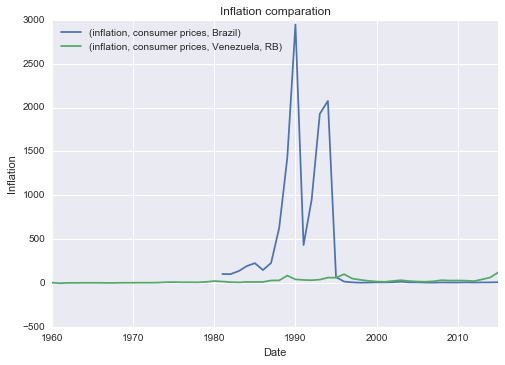

In [61]:
# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("Inflation comparation"); 
plt.xlabel('Date'); 
plt.ylabel('Inflation');